<center> <h1>📉 Logistic Regression 📉 </h1> </center>

<p> <center> This notebook is in <span style="color: green"> <b> Active </b> </span> state of development! </center> </p>  
<p> <center> Be sure to checkout my other notebooks for <span style="color: blue"> <b> knowledge, insight and laughter </b> </span>! 🧠💡😂</center> </p> 

<center> <img src="https://i.redd.it/84w2yii8tcs31.png" width="400" height="400" /> </center>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

# Aim

The aim is to provide, from scratch, code implementations for linear regression problems. This will involve both the main functions needed to solve a linear regression and some additional utility functions as well.

**Note**: We will not be diving into in-depth exploratory data analysis, feature engineering etc... in these notebooks and so will not be commenting extensively on things such as skewness, kurtosis, homoscedasticity etc...

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

# Background

Logistic regression, despite its name, is a linear model for classification rather than regression. The reason why the term logistic *regression* is used becomes obvious once we examine the logistic function (often also called sigmoid function):
$$g(z) = \frac{1}{1+e^{-z}}$$

Recall that the logistic regression hypothesis is defined as:

$$ h_\theta(\underline{x}) = g(\underline{x}^T\underline{\theta})$$

where the function $g$ is the sigmoid function.

Types of Logistic Regression:

1. Binary (Pass/Fail)
2. Multi (Cats, Dogs, Sheep)
3. Ordinal (Low, Medium, High)

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## Import Modules

In [1]:
# Importing standard packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, r2_score

## Logistic Function (Sigmoid)

In [2]:
def logistic_func(z: List) -> np.array:
        
    """ Calculate logistic/sigmoid function . """

    return 1/(1+np.exp(-np.array(z)))

## Decision Boundary

Our current prediction/logistic function returns a probability score between 0 and 1. In order to map this to a discrete class (true/false, cat/dog), we select a threshold value or tipping point above which we will classify values into class 1 and below which we classify values into class 0.

$$p≥0.5,𝑐𝑙𝑎𝑠𝑠=1$$
$$p<0.5,𝑐𝑙𝑎𝑠𝑠=0$$

For example, if our threshold was 0.5 and our prediction function returned 0.7, we would classify this observation as positive (class 1). If our prediction was 0.2 we would classify the observation as negative (class 0). For logistic regression with multiple classes we could select the class with the highest predicted probability.

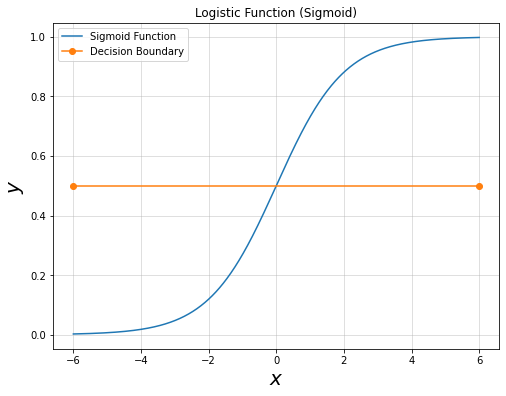

In [3]:
# Plot logistic function
plt.figure(figsize=(8,6))
x = np.linspace(-6, 6, 1000)
y = logistic_func(x)
# Plot decision boundary
x1, y1 = [-6, 6], [0.5, 0.5]
plt.xlabel(r'$x$', size=20)
plt.ylabel(r'$y$', size=20)
plt.title('Logistic Function (Sigmoid)')
plt.grid(alpha=0.5)
plt.plot(x, y);
plt.plot(x1, y1, marker = 'o');
plt.legend(labels=["Sigmoid Function", "Decision Boundary"]);

# Data Collection

Depending on the type of data, certain metrics will be more important than others. Some examples are:
1. Maximise recall of model i.e. reduce the number of misclassifications of fraud cases (Type 2 errors/False Negatives).
2. Maximise precision of model i.e. reduce the number of misclassifications of non-fraud cases (Type 1 errors/False Positives)

We would like a balanced trade off between these metrics - this is encompassed in the F Score. 

**Note:** Maximising accuracy of the model can also be valuable information as it tells us how many datapoints we are correctly classifying however if we had a large imbalanced dataset, this is not necessarily reflective of our needs. 

In [4]:
# Import dataset
df = pd.read_csv('../input/heart-disease-prediction-using-logistic-regression/framingham.csv')
# Display dataframe
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


# Data Processing

In [5]:
# Check for Nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
# Check for NaNs 
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
# Check for duplicates
df.duplicated().sum()

0

# Data Visualisation

Let us look at the information obtained **before** applying the pre-processing steps:

In [8]:
# Overall statistics
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


,Quantity,Percentage
No Disease,3594,84.804153
Disease,644,15.195847


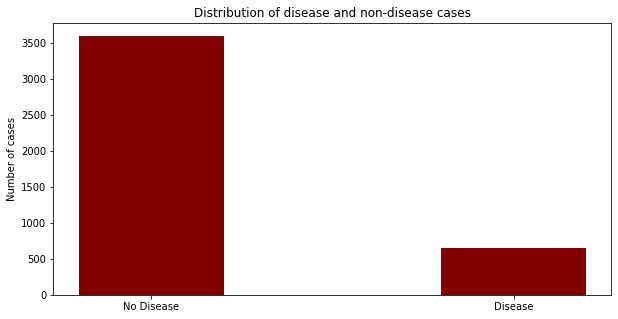

In [9]:
# Bar chart of class ratio 
target_pd = pd.DataFrame(index = ["No Disease","Disease"], columns= ["Quantity", "Percentage"])
# No disease
target_pd.loc["No Disease"]["Quantity"] = len(df[df.columns[-1]][df[df.columns[-1]]==0].dropna())
target_pd.loc["No Disease"]["Percentage"] = target_pd.iloc[0,0]/len(df[df.columns[-1]])*100
# Disease
target_pd.loc["Disease"]["Quantity"] = len(df[df.columns[-1]][df[df.columns[-1]]==1].dropna())
target_pd.loc["Disease"]["Percentage"] = target_pd.iloc[1,0]/len(df[df.columns[-1]])*100
# Plot barchart
fig = plt.figure(figsize = (10, 5))
plt.bar(list(target_pd.index), target_pd.iloc[:,0], color ='maroon',width = 0.4)
plt.ylabel("Number of cases")
plt.title("Distribution of disease and non-disease cases");
# Print the dataframe
target_pd

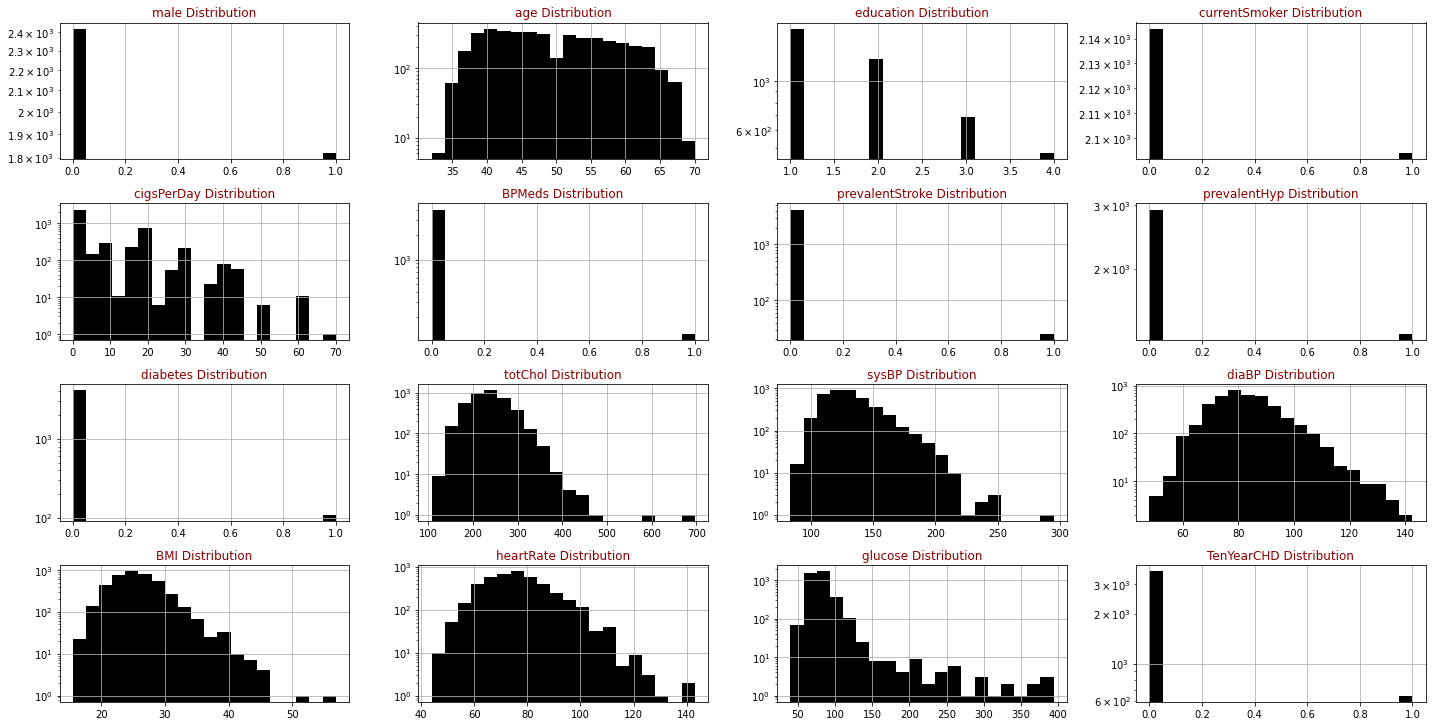

In [10]:
# Histogram of features (check for skew)
fig=plt.figure(figsize=(20,20))
for i, feature in enumerate(df.columns):
    ax=fig.add_subplot(8,4,i+1)
    df[feature].hist(bins=20,ax=ax,facecolor='black')
    ax.set_title(feature+" Distribution",color='DarkRed')
    ax.set_yscale('log')
fig.tight_layout()  

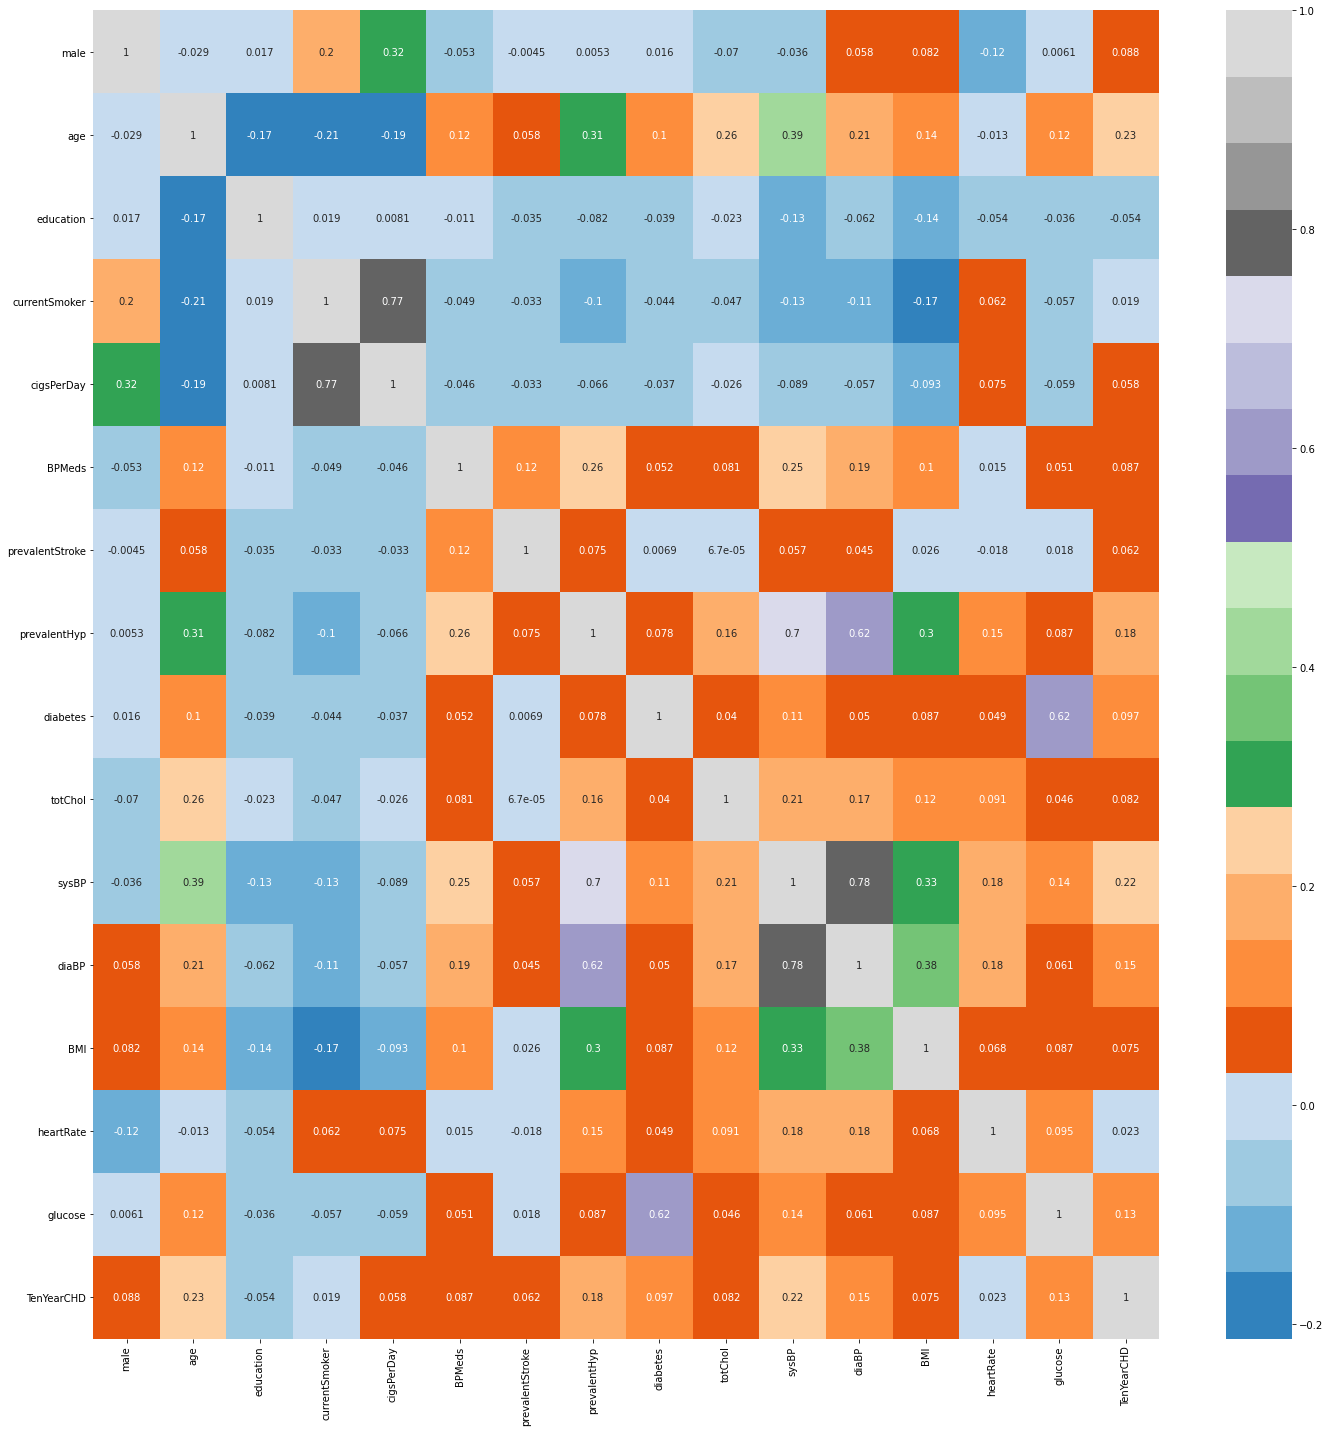

In [11]:
# Check for correlation
fig=plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, cmap="tab20c");
fig.tight_layout()  

Let us look at the information obtained **after** applying the pre-processing steps:

In [12]:
# Drop NaNs and duplicates
df = df.dropna().drop_duplicates().reset_index(drop=True)

In [13]:
# Overall statistics
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


,Quantity,Percentage
No Disease,3099,84.76477
Disease,557,15.23523


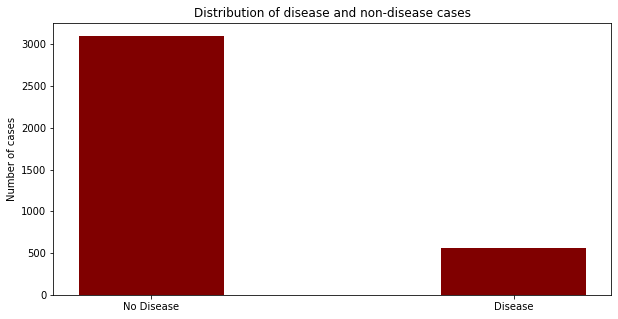

In [14]:
# Bar chart of class ratio 
target_pd = pd.DataFrame(index = ["No Disease","Disease"], columns= ["Quantity", "Percentage"])
# No disease
target_pd.loc["No Disease"]["Quantity"] = len(df[df.columns[-1]][df[df.columns[-1]]==0].dropna())
target_pd.loc["No Disease"]["Percentage"] = target_pd.iloc[0,0]/len(df[df.columns[-1]])*100
# Disease
target_pd.loc["Disease"]["Quantity"] = len(df[df.columns[-1]][df[df.columns[-1]]==1].dropna())
target_pd.loc["Disease"]["Percentage"] = target_pd.iloc[1,0]/len(df[df.columns[-1]])*100
# Plot barchart
fig = plt.figure(figsize = (10, 5))
plt.bar(list(target_pd.index), target_pd.iloc[:,0], color ='maroon',width = 0.4)
plt.ylabel("Number of cases")
plt.title("Distribution of disease and non-disease cases");
# Print the dataframe
target_pd

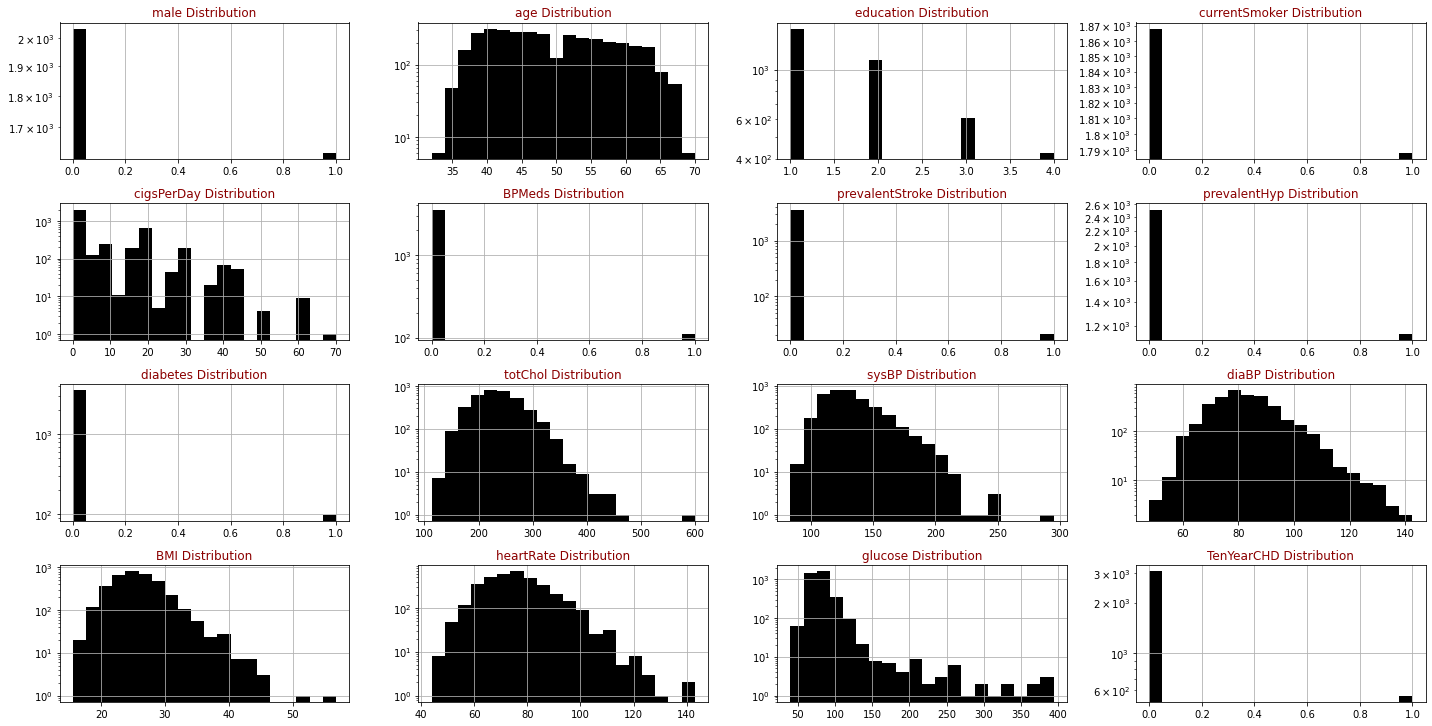

In [15]:
# Histogram of features (check for skew)
fig=plt.figure(figsize=(20,20))
for i, feature in enumerate(df.columns):
    ax=fig.add_subplot(8,4,i+1)
    df[feature].hist(bins=20,ax=ax,facecolor='black')
    ax.set_title(feature+" Distribution",color='DarkRed')
    ax.set_yscale('log')
fig.tight_layout()  

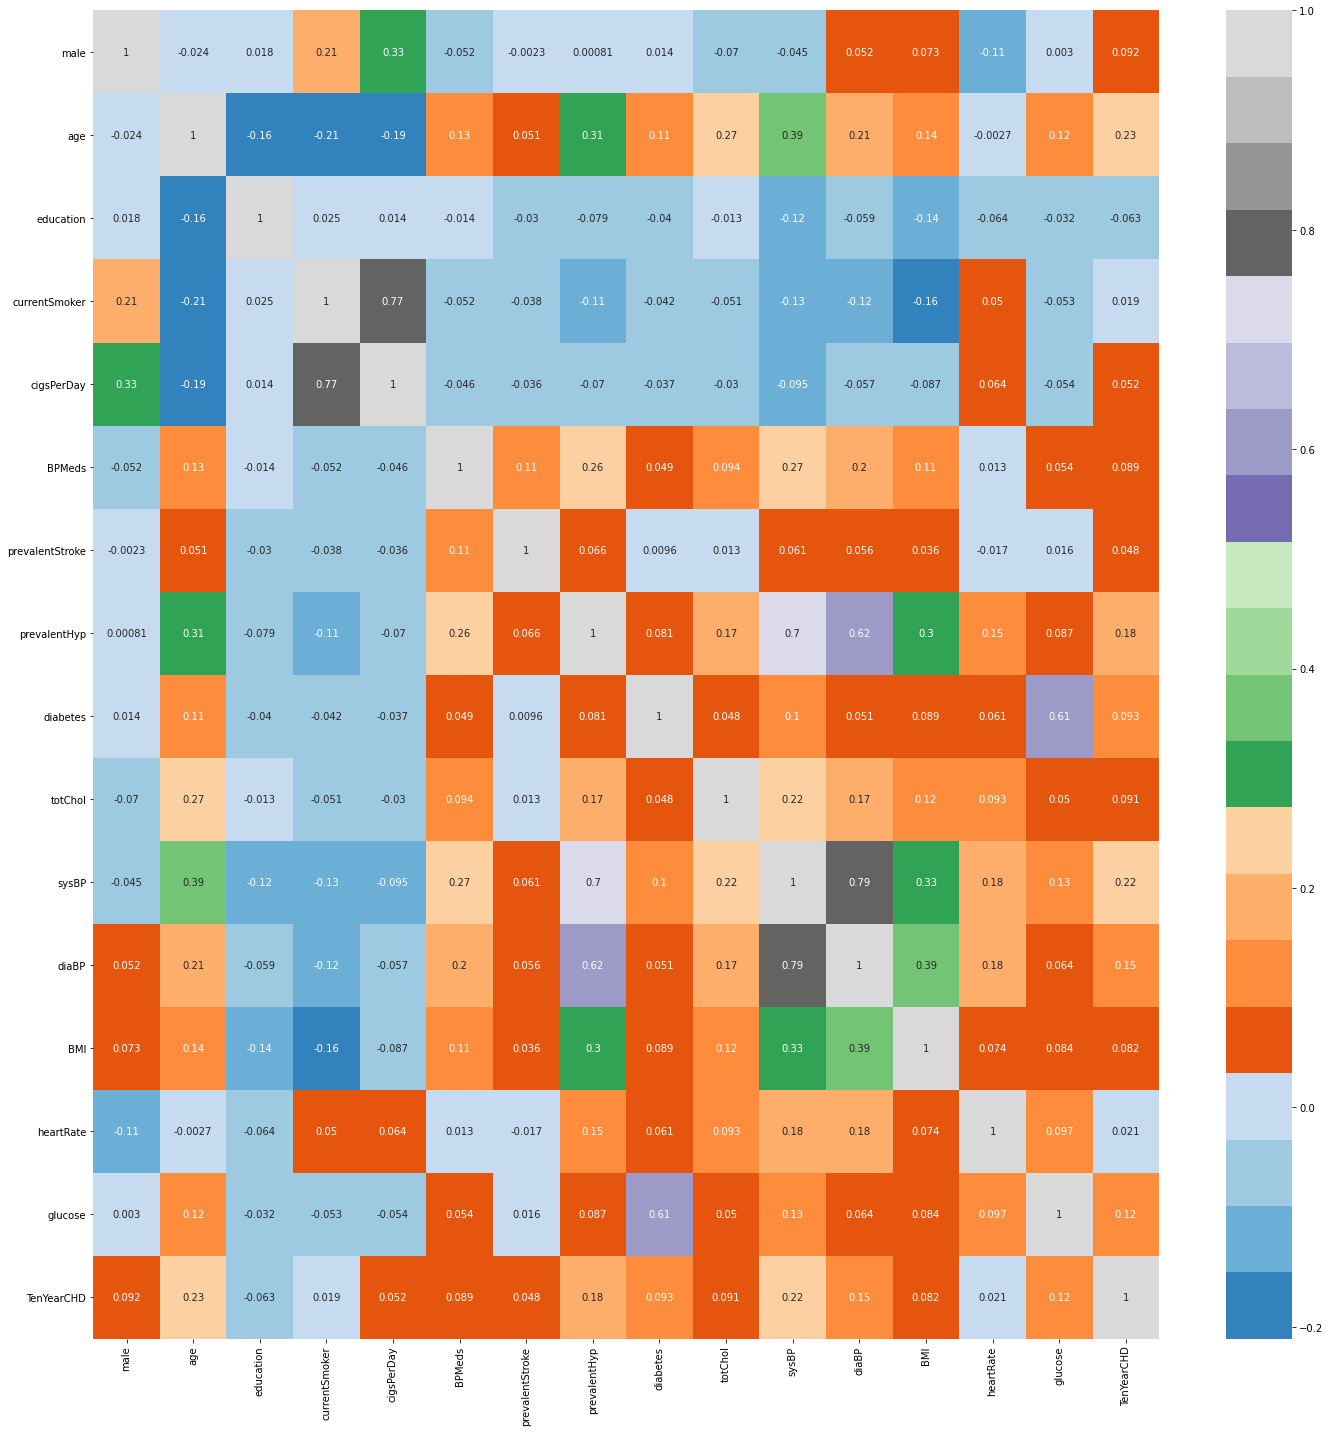

In [16]:
# Check for correlation
fig=plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, cmap="tab20c");
fig.tight_layout()  

We can see not much has changed from the overall statistics of the data after pre-processing which is excellent! We can no proceed with machine learning models.

**Note:** Instead of just removing the NaNs, we could have imputed them with different techniques. 

## Splitting dataset

For most machine learning models, we would like them to have low bias and low variance - that is, the model should perform well on the training set (low bias) and also the test set, alongside with other new random test sets (low variance). Therefore, to test for bias and variance of our model, we shall split the dataset into training and test set. We will not be tuning any hyperparameters (and thus do not need a validation set).  We will not be tuning any hyperparameters (and thus do not need a validation set). 

For these functions, the $X$ dataset (of features) should have a column 1's as the first column to account for the bias term/intercept co-efficient. Before this occurs, one should check the order of magnitude of the features - if they differ hugely, one must apply feature scaling. Having looked at the data however, it is clear that the order of magnitude of some of the features are very different, so we must perform feature scaling. 

In [17]:
# Create X (features) and y (target) dataset
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [18]:
def feature_scaling(X: pd.DataFrame) -> pd.DataFrame:
    
    """ Normalises the features in X (dataframe) and returns a normalized version of X where the mean value of each feature is 0 and the standard deviation is 1. """
    
    # Return normalised data
    return (X - np.mean(X, axis=0))/np.std(X, axis=0, ddof=0)

In [19]:
# Create normalised data
X = feature_scaling(X)
# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=42, stratify=y)
# Re-index
X_train = X_train.reset_index(drop=True) 
y_train = y_train.reset_index(drop=True) 
X_test = X_test.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

In [20]:
# Add ones to the dataframes
m,n = X_train.values.shape
o,p = X_test.values.shape
X_train = pd.concat((pd.DataFrame(np.ones((m, 1)), columns= ['Bias']),X_train),axis=1)
X_test = pd.concat((pd.DataFrame(np.ones((o, 1)), columns= ['Bias']),X_test),axis=1)

# Cost Function

Recall that the cost function (known as cross entropy) in logistic regression is:

$$ G(\boldsymbol{\theta}) = \frac{1}{n} \sum_{i=1}^{n} Cost\left(h_\theta\left( x^{(i)} \right), y^{(i)} \right)$$
where
$$ Cost\left(h_\theta\left( x \right), y \right) = \log\left(h_\theta\left( x \right) \right) \qquad \text{if} \ y=1$$
$$ Cost\left(h_\theta\left( x \right), y \right) = -\log\left(1-h_\theta\left( x \right) \right) \qquad \text{if} \ y=0$$

Compressing these events together into one (by treating the predictions as Bernoulli random variable events), we obtain:

$$ G(\boldsymbol{\theta}) = \pm \frac{1}{n} \sum_{i=1}^{n} \left[ y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) + \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

**Note:** Depending on visualisation, we'd like our cost function to be positive so in this case we will take $G(\boldsymbol \theta)$ to take on the negative argument.

# Gradient Function

Through partial differentiation, the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$
element (for $j = 0, 1, \cdots , n$) is defined as follows:

$$ \frac{\partial G(\boldsymbol\theta)}{\partial \theta_j} = \frac{1}{n} \sum_{i=1}^n \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

**Note:** While this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$.

## Vectorised notation

It is easier to use vectorised notation to code this:

$$ h_\theta\left( x \right) = g\left(X \theta \right) \qquad \text{logistic regression hypothesis} $$
$$ G(\boldsymbol{\theta}) = \pm \frac{1}{n} \cdot \left(y^T log\left(h\right) - \left(1-y\right)^T log\left(1-h\right) \right) \qquad \text{cost function} $$
$$ \frac{\partial G(\boldsymbol\theta)}{\partial \theta} = \frac{1}{n} \cdot X^T(h-y) \qquad \text{gradient function} $$

In [21]:
def LR_CG(X: pd.DataFrame, y: pd.Series, theta: np.array) -> Tuple[Dict, float]:
    
    """ Calculate the cost and gradients of the logistic model via gradient descent. """

    n = X.shape[0]
    h = self.logistic_func(X @ theta)
    # Cost function (add minus for appropriacy)
    cost = -1/n * (y.T @ np.log(h) + (1 - y).T @ np.log(1-h)) 
    # Derivatives
    dtheta = 1/n * (X.T @ (h-y))
    # Store gradients in a dictionary
    grads = {"dtheta": dtheta}
    return grads, cost

# Batch Gradient Descent

Recall that the parameters of our model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $G(\underline{\theta})$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{\partial G(\boldsymbol\theta)}{\partial \theta_j} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $G(\boldsymbol \theta)$ (see p.g. 10 [Logistic Regression](https://web.stanford.edu/~jurafsky/slp3/5.pdf)).

In [22]:
def BGD(X: pd.DataFrame, y: pd.Series, num_iterations: int, theta: np.array) -> Tuple[Dict, Dict, float]:
    
    """ Perform batch gradient descent on theta parameters for the logistic regression to find minimum cost function. """

    costs = []
    for i in range(num_iterations):
        # Calculate cost and gradients 
        grads, cost = LR_CG(X, y, theta)
        # Retrieve derivatives from grads
        dtheta = grads["dtheta"]
        # Updating estimate parameters
        theta = theta - learning_rate * dtheta  
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        # Save parameters and gradients in dictionary
        params = {"theta": theta}
        grads = {"dtheta": dtheta}
    return params, grads, costs

# Regression Predictions

In [23]:
def predict(X: pd.DataFrame, y: pd.Series, theta_estimate: np.array, threshold: float) -> pd.Series:
    
    """ Compute regression predictions for the logistic model. """

    n = X.shape[0]
    # Initialise parameters
    y_pred = np.zeros(n)
    # Compute vector hypothesis predicting the probabilities
    h = logistic_func(X @ theta_estimate)
    # Convert probabilities y_log_prob to binary predictions
    y_pred[h>=threshold] = 1
    y_pred[h<threshold] = 0
    return y_pred


# Full Logistic Regression Model

In [24]:
class LogisticRegression():
    
    def __init__(self, theta: np.array, num_iterations: int, learning_rate: float, threshold: float):
    
        """ Initialise parameters. """
       
        self.num_iterations = num_iterations
        self.learning_rate = learning_rate
        self.threshold = threshold
    
    def fit(self, X: pd.DataFrame, y: pd.Series) -> np.array:
    
        """ Fit logistic regression model. """

        # Batch Gradient Descent
        params, grads, costs = self.BGD(X, y)
        # Retrieve theta parameters from dictionary "parameters"
        return params["theta"]
    
    def predict(self, X: pd.DataFrame, theta_estimate: np.array) -> pd.Series:
    
        """ Compute regression predictions for the logistic model. """

        n = X.shape[0]
        # Initialise parameters
        y_pred = np.zeros(n)
        # Compute vector hypothesis predicting the probabilities
        h = self.logistic_func(X @ theta_estimate)
        # Convert probabilities y_log_prob to binary predictions
        y_pred[h>=self.threshold] = 1
        y_pred[h<self.threshold] = 0
        return y_pred
    
    def logistic_func(self, z: List) -> np.array:
        
        """ Calculate logistic/sigmoid function . """
        
        return 1/(1+np.exp(-np.array(z)))

    def LR_CG(self, X: pd.DataFrame, y: pd.Series, theta: np.array) -> Tuple[Dict, float]:
    
        """ Calculate the cost and gradients of the logistic model via gradient descent. """
        
        n = X.shape[0]
        h = self.logistic_func(X @ theta)
        # Cost function (add minus for appropriacy)
        cost = -1/n * (y.T @ np.log(h) + (1 - y).T @ np.log(1-h)) 
        # Derivatives
        dtheta = 1/n * (X.T @ (h-y))
        # Store gradients in a dictionary
        grads = {"dtheta": dtheta}
        return grads, cost

    def BGD(self, X: pd.DataFrame, y: pd.Series) -> Tuple[Dict, Dict, float]:
    
        """ Perform batch gradient descent on theta parameters for the logistic regression to find minimum cost function. """
    
        costs = []
        # Initialise theta
        theta = np.zeros(shape=(X.shape[1]), dtype=np.float32)
        for i in range(self.num_iterations):
            # Calculate cost and gradients 
            grads, cost = self.LR_CG(X, y, theta)
            # Retrieve derivatives from grads
            dtheta = grads["dtheta"]
            # Updating estimate parameters
            theta = theta - self.learning_rate*dtheta  
            # Record the costs
            if i % 100 == 0:
                costs.append(cost)
            # Save parameters and gradients in dictionary
            params = {"theta": theta}
            grads = {"dtheta": dtheta}
        return params, grads, costs

# Model Testing and Results

In [25]:
# Create parameters
params = {"theta": np.zeros(shape=(X_train.shape[1]), dtype=np.float32), "num_iterations": 1000, "learning_rate": 0.1, "threshold": 0.5}
# Instantiate model
heart_disease_model = LogisticRegression(**params)

In [26]:
# Fit model to training dataset to obtain estimates
theta_train = heart_disease_model.fit(X_train, y_train)
# Obtain predictions for training and test dataset
y_pred_train = heart_disease_model.predict(X_train, theta_train)
y_pred_test = heart_disease_model.predict(X_test, theta_train)
# Calculate R2 score on training and test dataset
print("Theta estimates are: \n{}".format(theta_train))
print("Train dataset accuracy: {}".format(np.float(sum(y_pred_train==y_train)) / float(len(y_train))))
print("Test dataset accuracy: {}".format(np.float(sum(y_pred_test==y_test)) / float(len(y_test))))

Theta estimates are: 
Bias              -1.996451
male               0.228384
age                0.541905
education         -0.072688
currentSmoker      0.015668
cigsPerDay         0.210488
BPMeds             0.013895
prevalentStroke    0.034943
prevalentHyp       0.145832
diabetes          -0.005792
totChol            0.123176
sysBP              0.304409
diaBP             -0.019116
BMI                0.029097
heartRate         -0.055210
glucose            0.181088
dtype: float64
Train dataset accuracy: 0.8530269876002917
Test dataset accuracy: 0.862144420131291


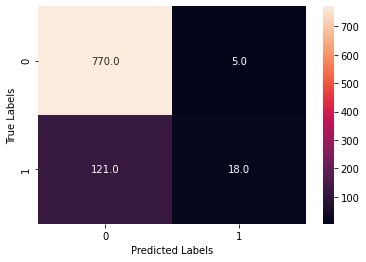

In [27]:
# Print confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
ax = sns.heatmap(cm_test, annot=True, fmt=".1f")
ax.set(xlabel="Predicted Labels", ylabel="True Labels");

In [28]:
# Print train metric report
pd.DataFrame(classification_report(y_test, y_pred_test, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.864198,0.782609,0.862144,0.823403,0.851790
recall,0.993548,0.129496,0.862144,0.561522,0.862144
f1-score,0.924370,0.222222,0.862144,0.573296,0.817588
support,775.000000,139.000000,0.862144,914.000000,914.000000


**Note:** The bottom labels are the true labels and the side labels are the predicted labels.

# Summary

- It is clear that once training is complete and we use the trained model to predict the test set, logistic regression performs excellently on predicting patients that will not have a 10 year risk of heart disease (high F Score for label 0) but performs poorly and misclassifies alot of the patients who do have a 10 year risk of heart disease (low F Score for label 1 due to low recall). 
- The accuracy is very high for both training and test dataset- this is not a good representation of the model's strength however as the dataset is heavily imabalanced and thus should not be used solely as the metric of importance. 
- From the analysis above, logistic regression is perhaps therefore not the best model to use for this type of dataset (if you want to be able to correctly classify patients who do have a 10 year risk of heart disease) - either using all of the features is not a good representation to classify patients as having a 10 year heart disease or due to the high multi-dimensional feature set, we need a more 'segregative' model e.g. Random Forest or KNN. 

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## Extra

Some comments about the code implementations:

1. Here we have created an entire python class for linear regression to make it similar to a machine learning pipeline format. If you would like to just use the functions by themselves, simply take them from the individual sections.
2. For the batch gradient descent function alone, we must feed an initialised theta parameter - usually this can be just zeros. 
3. We have kept with vectorised notation as it is much faster using matrices than loops.
4. Some of the code inputs have been hidden to make the notebook neater. You may look at the code by clicking on the 'show' button. 

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

Thanks for reading this notebook. If there are any mistakes or things that need more clarity, feel free to respond in the comment section and I will be happy to reply.

As always, please leave an upvote - it would also be helpful if you cite this documentation if you are going to use any of the code. 😊

#CodeWithSid